In [1]:
# import libraries
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Reading the image 

img = cv.imread('C:/Users/PRATHAM/Downloads/opencv.jpg')
cv.imshow('img', img)
cv.waitKey(10)

-1

### Color Spaces

In [3]:
# opencv default image type is BGR and matplotlib's is RGB

In [4]:
# converting bgr to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)
cv.waitKey(0)

100

In [5]:
# Converting to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('hsv', hsv)
cv.waitKey(0)

100

In [6]:
# Converting to LAB 
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('lab',lab)
cv.waitKey(0)

100

In [7]:
# Converting BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('rgb',rgb)
cv.waitKey(0)

100

In [8]:
# you cannot convert HSV to grayscale directly. You first have to convert HSV to BGR and then BGR to grayscale
bgr = cv.cvtColor(img, cv.COLOR_HSV2BGR)
grayscale = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
cv.imshow('grayscale',grayscale)
cv.waitKey(0)

100

### Color Channels

In [9]:
# Splitting the image into three color channels (images will be in grayscale)
b ,g, r = cv.split(img)
cv.imshow('Blue',b)
cv.imshow('Green', g)
cv.imshow('Red',r)
cv.waitKey(0)

# lighter distribution represents the higher concentration of that color

100

In [10]:
# BGR has 3 color channels and grayscale has 1

In [11]:
# Merging the color channels
merged = cv.merge([b, g, r])
cv.imshow('Merged', merged)
cv.waitKey(0)

100

In [12]:
# here the images will be in their respective colors
blank  = np.zeros(img.shape[:2], dtype ='uint8')
blue = cv.merge([b,blank,blank])
green = cv.merge([g,blank,blank])
red = cv.merge([r,blank,blank])
cv.imshow('Blue',blue)
cv.imshow('Green', green)
cv.imshow('Red',red)
cv.waitKey(0)


100

### Smoothing and Blurring Techniques

In [13]:
# Averaging - takes the intensity of surrounding pixels of a kernel window and then average it 
average = cv.blur(img,(3,3))
cv.imshow('Average',average)
cv.waitKey(0)

100

In [14]:
# Gaussian Blur (more natural and less blur than average) - same as above only instead of average we give some weights to the surrounding pixel's intensity
gaussian = cv.GaussianBlur(img,(3,3), 0) # here 0 is the standard deviation in x direction
cv.imshow('Gaussian', gaussian)
cv.waitKey(0)

100

In [15]:
# Median Blur
median = cv.medianBlur(img,3) # here opencv already assumes kernel size is 3*3 
cv.imshow('Median', median)
cv.waitKey(0)

100

In [16]:
# bilateral blurring (most effective)
# Applies blur but also retains the edges unlike traditional methods
bilateral = cv.bilateralFilter(img,10, 35, 25) # 5 is diameter of kernel, 15 is sigmaColor, 15 is sigmaSpace
cv.imshow('Bilateral', bilateral)
cv.waitKey(0)

100

### Bitwise Operators

In [17]:
blank1 = np.zeros((400,400), dtype='uint8')

In [18]:
rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1 )
circle = cv.circle(blank.copy(),(200,200),200,255,-1)

In [19]:
cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)
cv.waitKey(0)

100

In [20]:
# bitwise AND (returns the intersection part of two images)
bitwise_and = cv.bitwise_and(rectangle,circle)
cv.imshow('Bitwise_AND', bitwise_and)
cv.waitKey(0)


100

In [21]:
# bitwise_OR ( returns both intersection and non-intersection part of two images)
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow('Bitwise_or', bitwise_or)
cv.waitKey(0)

100

In [22]:
# bitwise_XOR (returns non intersecting regions)
bitwise_xor = cv.bitwise_xor(rectangle,circle)
cv.imshow('Bitwise_xor', bitwise_xor)
cv.waitKey(0)

100

In [23]:
# bitwise_not -(convert white regions to black and vice-versa) 
bitwise_not = cv.bitwise_not(rectangle)
cv.imshow('Bitwise_not', bitwise_not)
cv.waitKey(0)

100

### Masking

In [24]:
# reuturns a specific regions/area in an image 

In [25]:
mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100,255,-1) #thickness = -1
cv.imshow('Mask', mask)
cv.waitKey(0)

100

In [26]:
masked = cv.bitwise_and(img,img,mask=mask)
cv.imshow('Masked Image', masked)
cv.waitKey(0)

100

In [27]:
weird_shape = cv.bitwise_and(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)
weird_mask = cv.bitwise_and(img, img, weird_shape)
cv.imshow('Weird Shaped Image', weird_mask)
cv.waitKey(0)

100

### Histogram Computation

In [28]:
# Histogram gives the distribution of the intensity of the pixels

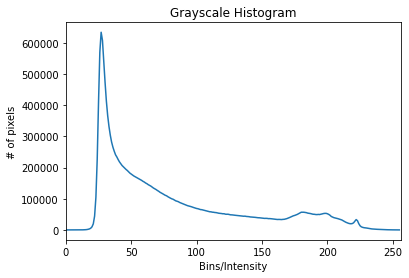

In [29]:
# Grayscale histogram
gray_hist = cv.calcHist([gray],[0],None, [256],[0,256]) # 0 is the no. of channels, mask is none, 256 is histsize, ranges is [0,256]
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins/Intensity')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

# instead of None we can use a mask to get the distribution of the intensity of different colors using the histogram

In [30]:
# Color Histogram

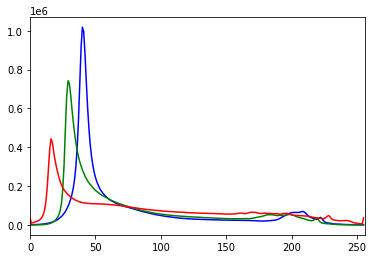

In [31]:
colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])
plt.show()

### Thresholding/Binarizing

In [32]:
# Simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY) #150 is thresh value and 255 is max value
cv.imshow('Simple_Threshold', thresh)
cv.waitKey(0)
# displays the part of image with white color that has pixel intensity values greater than 150

100

In [33]:
# Inverse Threshold (black pixels changes to white and vice-versa)
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV) #150 is thresh value and 255 is max value
cv.imshow('Simple_Threshold', thresh_inv)
cv.waitKey(0)
# displays the part of image with white color that has pixel intensity values less than 150

100

In [38]:
# Adaptive Threshold (Let the computer find the optimal value of Threshold)
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 3) #11 is blocksize and 3 is C which is subtracted from mean
cv.imshow('Adaptive Thresh', adaptive_thresh)
cv.waitKey(0)



100

### Edge Detection

In [40]:
# laplacian Method (calculates the gradients of the edges)
lap = cv.Laplacian(gray, cv.CV_64F) # datadepth is CV_64F
lap = np.uint8(np.absolute(lap))
cv.imshow('Lap', lap)
cv.waitKey(0)



100

In [42]:
# Sobel (calculates gradients in both x and y direction)
sobelx = cv.Sobel(gray,cv.CV_64F,1,0) # ydirection gradients are 0
sobely = cv.Sobel(gray, cv.CV_64F,0,1)
combined_sobel = cv.bitwise_or(sobelx,sobely)
cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)
cv.imshow('Combined Sobel', combined_sobel)
cv.waitKey(0)

100

In [44]:
# comparing with Canny (multistep method - more advanced method)
canny =cv.Canny(gray, 150, 175 )
cv.imshow('Canny', canny)
cv.waitKey(0)

#Commonly used- Canny, in more advanced use cases - sobel

100

In [45]:
cv.destroyAllWindows()